# <div align="center"> UTS IF540 MACHINE LEARNING </div>
## <div align="center"> Covid Detection Based On Symtomps</div>
### <div align="center"> Linear Discriminant Analysis </div>

#### <div align="center"> Semester Ganjil 2022/2023 </div>


---

### Dataset yang dipakai:

https://www.kaggle.com/datasets/hemanthhari/symptoms-and-covid-presence?resource=download

### Referensi yang dipakai:

https://www.kaggle.com/code/midouazerty/symptoms-covid-19-using-7-machine-learning-98
https://www.kaggle.com/code/meesalasaidhanush/symptoms-and-covid-presence-99-acc
https://www.kaggle.com/code/dzuljalali/covid-19-classification-using-svm-svc

### Hasil kerja

#### Library

In [2]:
# import the Libraries
import numpy as np
import pandas as pd

# visualisasi data
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# dataprep
from dataprep.eda import *
from dataprep.eda.missing import plot_missing
from dataprep.eda import plot_correlation

# splitting the dataset into train set and test set
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix

# LDA
## feature scaling
from sklearn.preprocessing import StandardScaler

## import LDA model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

## import the Logistic Regression model from sklearn using the 2 variances with the help of LDA
from sklearn.linear_model import LogisticRegression

#### Import Dataset

In [3]:
# import the dataset
df = pd.read_csv('Covid Dataset.csv')

#### Data Preprocessing

##### Data Information

In [4]:
df.head(5)

Breathing Problem Fever Dry Cough Sore throat Running Nose Asthma  \
0               Yes   Yes       Yes         Yes          Yes     No   
1               Yes   Yes       Yes         Yes           No    Yes   
2               Yes   Yes       Yes         Yes          Yes    Yes   
3               Yes   Yes       Yes          No           No    Yes   
4               Yes   Yes       Yes         Yes          Yes     No   

  Chronic Lung Disease Headache Heart Disease Diabetes  ... Fatigue   \
0                   No       No            No      Yes  ...      Yes   
1                  Yes      Yes            No       No  ...      Yes   
2                  Yes      Yes            No      Yes  ...      Yes   
3                   No       No           Yes      Yes  ...       No   
4                  Yes      Yes           Yes      Yes  ...       No   

  Gastrointestinal  Abroad travel Contact with COVID Patient  \
0               Yes            No                        Yes   
1                No            No                         No   
2               Yes           Yes                         No   
3                No           Yes                         No   
4               Yes            No                        Yes   

  Attended Large Gathering Visited Public Exposed Places  \
0                       No                           Yes   
1                      Yes                           Yes   
2                       No                            No   
3                      Yes                           Yes   
4                       No                           Yes   

  Family working in Public Exposed Places Wearing Masks  \
0                                     Yes            No   
1                                      No            No   
2                                      No            No   
3                                      No            No   
4                                      No            No   

  Sanitization from Market COVID-19  
0                       No      Yes  
1                       No      Yes  
2                       No      Yes  
3                       No      Yes  
4                       No      Yes  

[5 rows x 21 columns]

In [5]:
df.describe()

Breathing Problem Fever Dry Cough Sore throat Running Nose Asthma  \
count               5434  5434      5434        5434         5434   5434   
unique                 2     2         2           2            2      2   
top                  Yes   Yes       Yes         Yes          Yes     No   
freq                3620  4273      4307        3953         2952   2920   

       Chronic Lung Disease Headache Heart Disease Diabetes  ... Fatigue   \
count                  5434     5434          5434     5434  ...     5434   
unique                    2        2             2        2  ...        2   
top                      No      Yes            No       No  ...      Yes   
freq                   2869     2736          2911     2846  ...     2821   

       Gastrointestinal  Abroad travel Contact with COVID Patient  \
count               5434          5434                       5434   
unique                 2             2                          2   
top                   No            No                        Yes   
freq                2883          2983                       2726   

       Attended Large Gathering Visited Public Exposed Places  \
count                      5434                          5434   
unique                        2                             2   
top                          No                           Yes   
freq                       2924                          2820   

       Family working in Public Exposed Places Wearing Masks  \
count                                     5434          5434   
unique                                       2             1   
top                                         No            No   
freq                                      3172          5434   

       Sanitization from Market COVID-19  
count                      5434     5434  
unique                        1        2  
top                          No      Yes  
freq                       5434     4383  

[4 rows x 21 columns]

In [6]:
df.columns

Index(['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
       'Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache',
       'Heart Disease', 'Diabetes', 'Hyper Tension', 'Fatigue ',
       'Gastrointestinal ', 'Abroad travel', 'Contact with COVID Patient',
       'Attended Large Gathering', 'Visited Public Exposed Places',
       'Family working in Public Exposed Places', 'Wearing Masks',
       'Sanitization from Market', 'COVID-19'],
      dtype='object')

  0%|          | 0/230 [00:00<?, ?it/s]

C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\dask\core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))



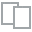
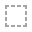
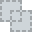
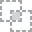
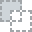
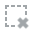
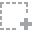
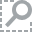
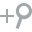
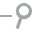
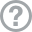
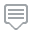
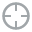
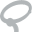
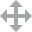
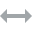
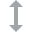
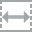
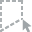
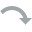
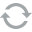
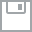
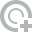
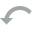
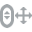
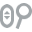
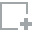
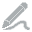
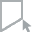
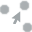
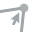
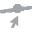

In [7]:
plot_missing(df)

In [8]:
# create a table with data missing 
missing_values=df.isnull().sum() # missing values

percent_missing = df.isnull().sum()/df.shape[0]*100 # missing value %

value = {
    'missing_values ':missing_values,
    'percent_missing %':percent_missing  
}
frame=pd.DataFrame(value)
frame

missing_values   percent_missing %
Breathing Problem                                      0                0.0
Fever                                                  0                0.0
Dry Cough                                              0                0.0
Sore throat                                            0                0.0
Running Nose                                           0                0.0
Asthma                                                 0                0.0
Chronic Lung Disease                                   0                0.0
Headache                                               0                0.0
Heart Disease                                          0                0.0
Diabetes                                               0                0.0
Hyper Tension                                          0                0.0
Fatigue                                                0                0.0
Gastrointestinal                                       0                0.0
Abroad travel                                          0                0.0
Contact with COVID Patient                             0                0.0
Attended Large Gathering                               0                0.0
Visited Public Exposed Places                          0                0.0
Family working in Public Exposed Places                0                0.0
Wearing Masks                                          0                0.0
Sanitization from Market                               0                0.0
COVID-19                                               0                0.0

<AxesSubplot:xlabel='COVID-19', ylabel='count'>

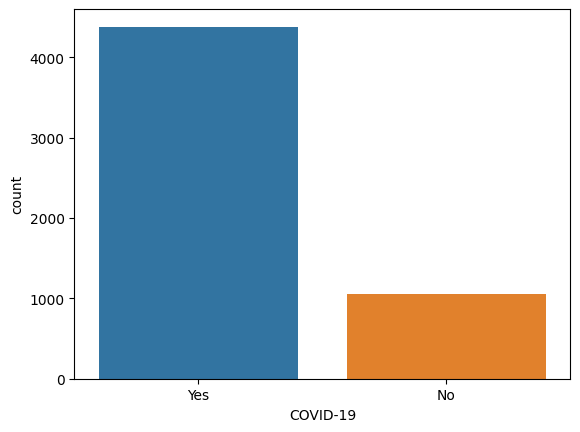

In [9]:
sns.countplot(x='COVID-19',data=df)

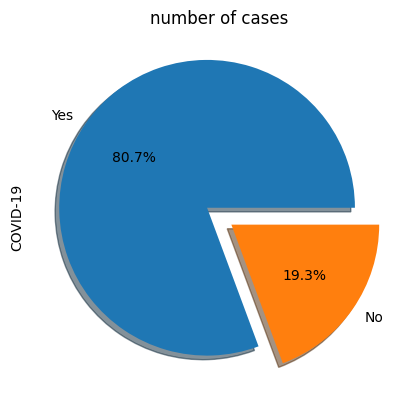

In [10]:
df["COVID-19"].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True)
plt.title('number of cases');

##### Breathing Problem

<AxesSubplot:xlabel='Breathing Problem', ylabel='count'>

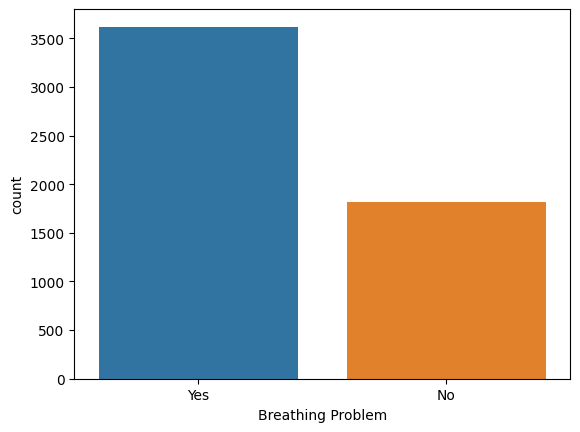

In [11]:
sns.countplot(x='Breathing Problem',data=df)

<AxesSubplot:xlabel='Breathing Problem', ylabel='count'>

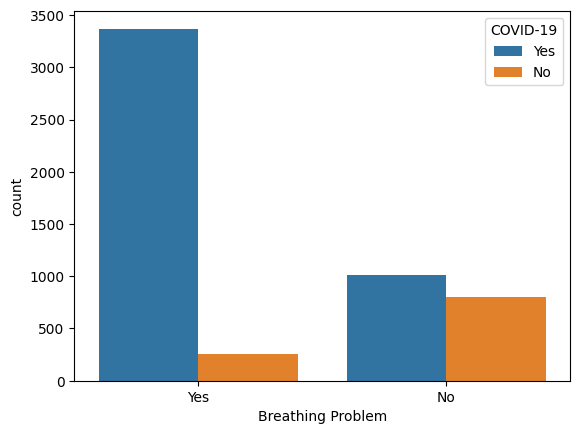

In [12]:
sns.countplot(x='Breathing Problem',hue='COVID-19',data=df)

##### Fever

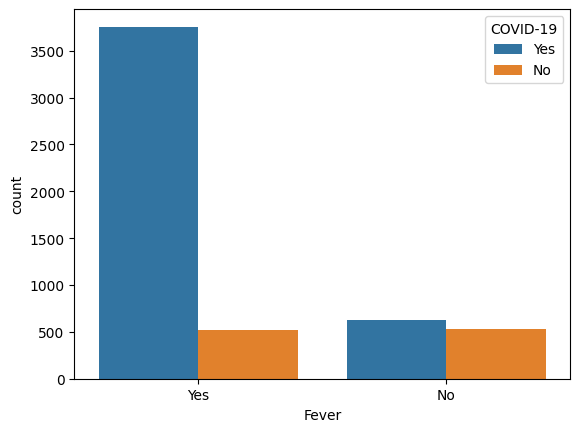

In [13]:
sns.countplot(x='Fever',hue='COVID-19',data=df);

##### Dry Cough

<AxesSubplot:xlabel='Dry Cough', ylabel='count'>

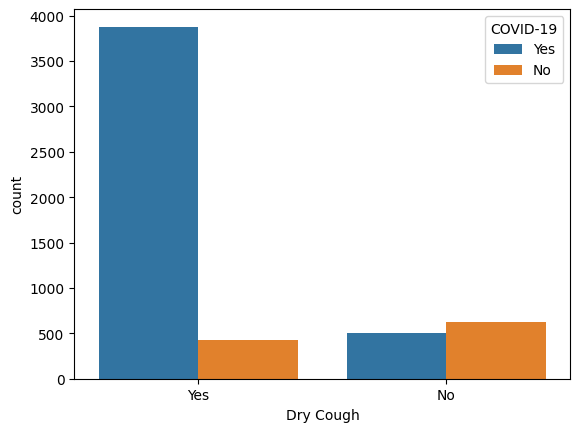

In [14]:
sns.countplot(x='Dry Cough',hue='COVID-19',data=df)

##### Sore Throat

<AxesSubplot:xlabel='Sore throat', ylabel='count'>

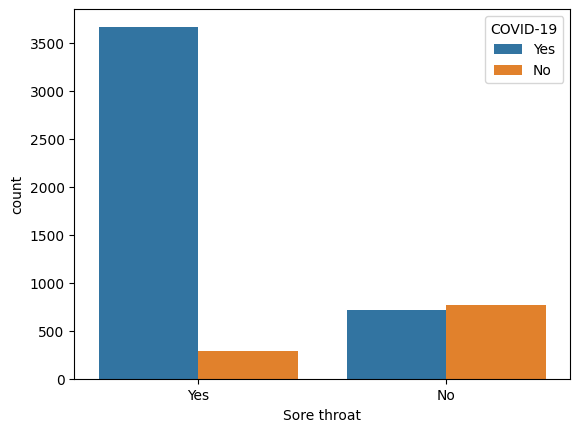

In [15]:
sns.countplot(x='Sore throat',hue='COVID-19',data=df)

##### Feature Transformation

In [16]:
from sklearn.preprocessing import LabelEncoder
e=LabelEncoder()

In [17]:

df['Breathing Problem']=e.fit_transform(df['Breathing Problem'])
df['Fever']=e.fit_transform(df['Fever'])
df['Dry Cough']=e.fit_transform(df['Dry Cough'])
df['Sore throat']=e.fit_transform(df['Sore throat'])
df['Running Nose']=e.fit_transform(df['Running Nose'])
df['Asthma']=e.fit_transform(df['Asthma'])
df['Chronic Lung Disease']=e.fit_transform(df['Chronic Lung Disease'])
df['Headache']=e.fit_transform(df['Headache'])
df['Heart Disease']=e.fit_transform(df['Heart Disease'])
df['Diabetes']=e.fit_transform(df['Diabetes'])
df['Hyper Tension']=e.fit_transform(df['Hyper Tension'])
df['Fatigue ']=e.fit_transform(df['Fatigue '])
df['Gastrointestinal ']=e.fit_transform(df['Gastrointestinal '])
df['Abroad travel']=e.fit_transform(df['Abroad travel'])
df['Contact with COVID Patient']=e.fit_transform(df['Contact with COVID Patient'])
df['Attended Large Gathering']=e.fit_transform(df['Attended Large Gathering'])
df['Visited Public Exposed Places']=e.fit_transform(df['Visited Public Exposed Places'])
df['Family working in Public Exposed Places']=e.fit_transform(df['Family working in Public Exposed Places'])
df['Wearing Masks']=e.fit_transform(df['Wearing Masks'])
df['Sanitization from Market']=e.fit_transform(df['Sanitization from Market'])
df['COVID-19']=e.fit_transform(df['COVID-19'])

In [18]:
# print dataset again
df.head(5)

Breathing Problem  Fever  Dry Cough  Sore throat  Running Nose  Asthma  \
0                  1      1          1            1             1       0   
1                  1      1          1            1             0       1   
2                  1      1          1            1             1       1   
3                  1      1          1            0             0       1   
4                  1      1          1            1             1       0   

   Chronic Lung Disease  Headache  Heart Disease  Diabetes  ...  Fatigue   \
0                     0         0              0         1  ...         1   
1                     1         1              0         0  ...         1   
2                     1         1              0         1  ...         1   
3                     0         0              1         1  ...         0   
4                     1         1              1         1  ...         0   

   Gastrointestinal   Abroad travel  Contact with COVID Patient  \
0                  1              0                           1   
1                  0              0                           0   
2                  1              1                           0   
3                  0              1                           0   
4                  1              0                           1   

   Attended Large Gathering  Visited Public Exposed Places  \
0                         0                              1   
1                         1                              1   
2                         0                              0   
3                         1                              1   
4                         0                              1   

   Family working in Public Exposed Places  Wearing Masks  \
0                                        1              0   
1                                        0              0   
2                                        0              0   
3                                        0              0   
4                                        0              0   

   Sanitization from Market  COVID-19  
0                         0         1  
1                         0         1  
2                         0         1  
3                         0         1  
4                         0         1  

[5 rows x 21 columns]

In [19]:
df.dtypes.value_counts()

int32    21
dtype: int64

##### Information After Transformation

In [20]:
df.describe(include='all')

Breathing Problem        Fever    Dry Cough  Sore throat  Running Nose  \
count        5434.000000  5434.000000  5434.000000  5434.000000   5434.000000   
mean            0.666176     0.786345     0.792602     0.727457      0.543246   
std             0.471621     0.409924     0.405480     0.445309      0.498172   
min             0.000000     0.000000     0.000000     0.000000      0.000000   
25%             0.000000     1.000000     1.000000     0.000000      0.000000   
50%             1.000000     1.000000     1.000000     1.000000      1.000000   
75%             1.000000     1.000000     1.000000     1.000000      1.000000   
max             1.000000     1.000000     1.000000     1.000000      1.000000   

            Asthma  Chronic Lung Disease     Headache  Heart Disease  \
count  5434.000000           5434.000000  5434.000000    5434.000000   
mean      0.462643              0.472028     0.503497       0.464299   
std       0.498648              0.499263     0.500034       0.498770   
min       0.000000              0.000000     0.000000       0.000000   
25%       0.000000              0.000000     0.000000       0.000000   
50%       0.000000              0.000000     1.000000       0.000000   
75%       1.000000              1.000000     1.000000       1.000000   
max       1.000000              1.000000     1.000000       1.000000   

          Diabetes  ...     Fatigue   Gastrointestinal   Abroad travel  \
count  5434.000000  ...  5434.000000        5434.000000    5434.000000   
mean      0.476261  ...     0.519139           0.469452       0.451049   
std       0.499482  ...     0.499680           0.499112       0.497644   
min       0.000000  ...     0.000000           0.000000       0.000000   
25%       0.000000  ...     0.000000           0.000000       0.000000   
50%       0.000000  ...     1.000000           0.000000       0.000000   
75%       1.000000  ...     1.000000           1.000000       1.000000   
max       1.000000  ...     1.000000           1.000000       1.000000   

       Contact with COVID Patient  Attended Large Gathering  \
count                 5434.000000               5434.000000   
mean                     0.501656                  0.461907   
std                      0.500043                  0.498593   
min                      0.000000                  0.000000   
25%                      0.000000                  0.000000   
50%                      1.000000                  0.000000   
75%                      1.000000                  1.000000   
max                      1.000000                  1.000000   

       Visited Public Exposed Places  Family working in Public Exposed Places  \
count                    5434.000000                              5434.000000   
mean                        0.518955                                 0.416268   
std                         0.499687                                 0.492984   
min                         0.000000                                 0.000000   
25%                         0.000000                                 0.000000   
50%                         1.000000                                 0.000000   
75%                         1.000000                                 1.000000   
max                         1.000000                                 1.000000   

       Wearing Masks  Sanitization from Market     COVID-19  
count         5434.0                    5434.0  5434.000000  
mean             0.0                       0.0     0.806588  
std              0.0                       0.0     0.395009  
min              0.0                       0.0     0.000000  
25%              0.0                       0.0     1.000000  
50%              0.0                       0.0     1.000000  
75%              0.0                       0.0     1.000000  
max              0.0                       0.0     1.000000  

[8 rows x 21 columns]

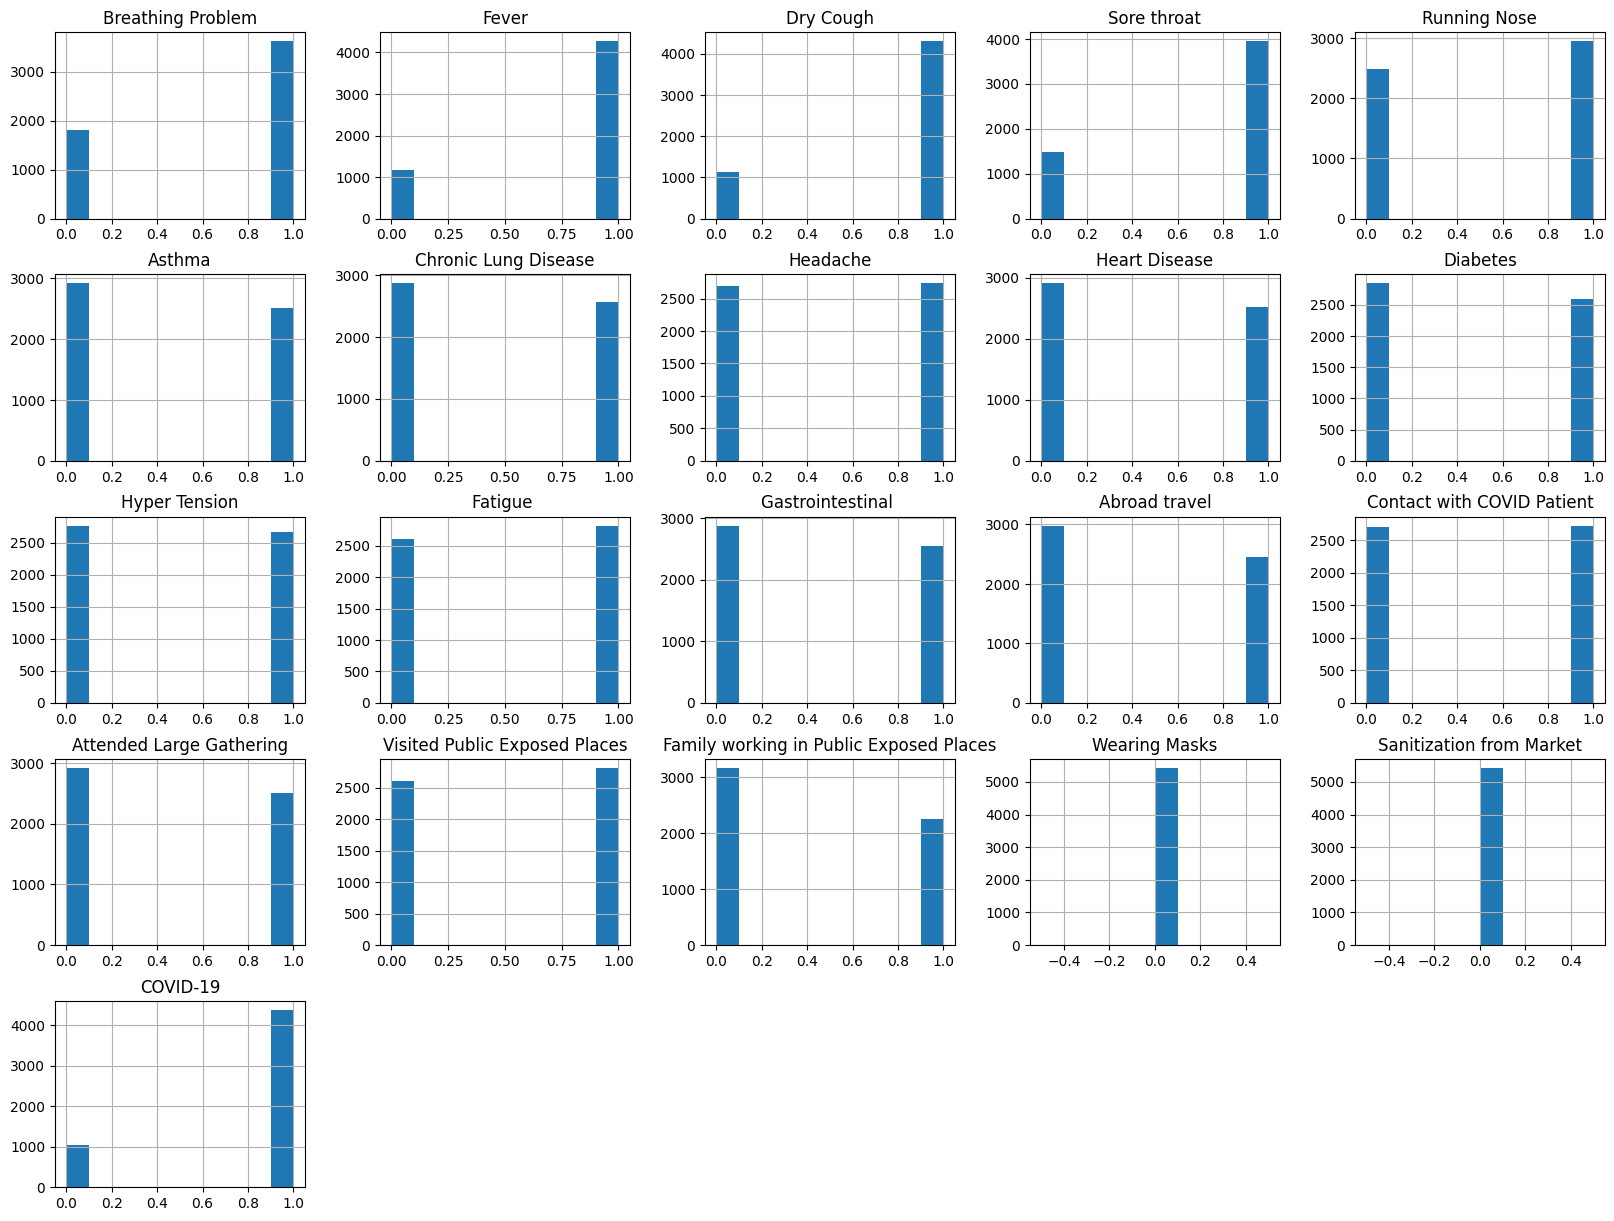

In [21]:
df.hist(figsize=(20,15));

##### Correlation Between Features

In [22]:
corr=df.corr()
corr.style.background_gradient(cmap='coolwarm',axis=None)

In [23]:
# beberapa data sama sekali tidak berkolerasi contohnya
# Running Nose / Asthma /Chronic Lung Disease / Headache / Heart Disease / Diabetes / Fatigue / Gastrointestinal / Wearing Masks / Sanitization from Market
# maka kita akan melakukan drop kepada data - data tersebut

df=df.drop('Running Nose',axis=1)
df=df.drop('Chronic Lung Disease',axis=1)
df=df.drop('Headache',axis=1)
df=df.drop('Heart Disease',axis=1)
df=df.drop('Diabetes',axis=1)
df=df.drop('Gastrointestinal ',axis=1)
df=df.drop('Wearing Masks',axis=1)
df=df.drop('Sanitization from Market',axis=1)
df=df.drop('Asthma',axis=1)
df=df.drop('Fatigue ',axis=1)

In [24]:
df.columns

Index(['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
       'Hyper Tension', 'Abroad travel', 'Contact with COVID Patient',
       'Attended Large Gathering', 'Visited Public Exposed Places',
       'Family working in Public Exposed Places', 'COVID-19'],
      dtype='object')

In [25]:
df.dtypes.value_counts()

int32    11
dtype: int64

In [26]:
corr=df.corr()
corr.style.background_gradient(cmap='coolwarm',axis=None)

In [27]:
X=df.drop('COVID-19',axis=1)
y=df['COVID-19']

#### Machine Learning Model

##### LDA

In [28]:
# splitting the dataset into train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
    random_state = 0)
    
# because our data is 0 and 1, feature scaling is not neeeded

# LDA
lda = LDA()
lda.fit(X_train, y_train)

X_train_lda = lda.transform(X_train)
X_test_lda = lda.transform(X_test)

In [29]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

# fitting the model
model.fit(X_train_lda, y_train)
y_pred = model.predict(X_test_lda)
#Score/Accuracy
acc_logreg=model.score(X_test_lda, y_test)*100
acc_logreg

94.84820607175713

### Kesimpulan

#### Confusion Matrix

<AxesSubplot:>

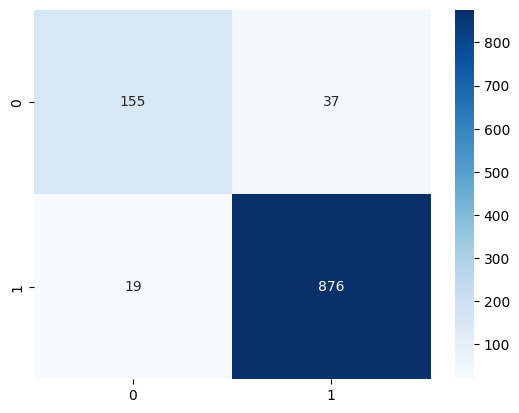

In [30]:
from sklearn.metrics import confusion_matrix

# create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

#### Accuracy Score For Prediction

In [31]:
# import the accuracy score
from sklearn.metrics import accuracy_score

# print the accuracy score
print(accuracy_score(y_test, y_pred))

0.9484820607175714


#### Precision Score For Prediction

In [32]:
# import the classification report
from sklearn.metrics import classification_report

# print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85       192
           1       0.96      0.98      0.97       895

    accuracy                           0.95      1087
   macro avg       0.93      0.89      0.91      1087
weighted avg       0.95      0.95      0.95      1087



### Implementation of The Model for user Input (STILL NOT THAT GREAT OF PREDICTION)

In [33]:
# use predict the result based on input. with the process of LDA
def predict_result():
    # input the data
    Breathing_Problem = int(input('Breathing Problem: '))
    Fever = int(input('Fever: '))
    Dry_Cough = int(input('Dry Cough: '))
    Sore_throat = int(input('Sore throat: '))
    Hyper_Tension = int(input('Hyper Tension: '))
    Abroad_travel = int(input('Abroad travel: '))
    Contact_with_COVID_Patient = int(input('Contact with COVID Patient: '))
    Attended_Large_Gathering = int(input('Attended Large Gathering: '))
    Visited_Public_Exposed_Places = int(input('Visited Public Exposed Places: '))
    Family_working_in_Public_Exposed_Places = int(input('Family working in Public Exposed Places: '))
    
    # create the array
    data = np.array([[Breathing_Problem, Fever, Dry_Cough, Sore_throat, Hyper_Tension, Abroad_travel, Contact_with_COVID_Patient, Attended_Large_Gathering, Visited_Public_Exposed_Places, Family_working_in_Public_Exposed_Places]])

    # transform the data
    data = lda.transform(data)

    # predict the result
    result = model.predict(data)

    # print the result
    if result == 0:
        print('Not Infected')
    else:
        print('Infected')

# call the function
predict_result()

Not Infected


C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


***

### Save the notebook, then convert the notebook to html (by running the next code).

In [34]:
!jupyter nbconvert --to html "./LDA-Project" --output-dir="./"

[NbConvertApp] Converting notebook ./LDA-Project.ipynb to html
[NbConvertApp] Writing 7767058 bytes to LDA-Project.html


### Next step:
* convert the generated html file to PDF using the online tool: https://www.sejda.com/html-to-pdf
* choose the following settings:
    * Page size: One long page
    * Page Orientation: auto
    * Use print stylesheet
* Submit your ipython notebook and PDF files

Markdown basics https://markdown-guide.readthedocs.io/en/latest/basics.html#